In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/CNN模型建立"

# **牡蠣圖庫4彩色+label關係全特徵模型建立**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# 載入資料數據集
df = pd.read_csv("/content/drive/MyDrive/Oyster_data(130)X4.csv")
df

,牡蠣索引 Oyster Index,牡蠣原始編號 Oyster Original Number,右殼長 Right Shell Length,左殼長 Left Shell Length,殼寬 Shell Width,殼高 Shell Height,面積 Area,體積 Volume,總重量 Total Weight,殼重 Shell Weight,肉重占總重量百分比(%) The proportion of Meat Weight in Total Weight(%),雜質重 Impurity Weight,肉重 Meat Weight
0,1,1,6.9,7.8,4.1,2.5,31.98,79.950,28.1,20.7,0.256228,0.2,7.2
1,2,2,6.3,7.8,5.2,3.6,40.56,146.016,50.0,42.4,0.180000,-1.4,9.0
2,3,3,9.1,10.5,4.6,2.1,48.30,101.430,38.0,27.1,0.281579,0.2,10.7
3,4,4,6.7,8.2,4.3,2.4,35.26,84.624,34.6,24.8,0.303468,-0.7,10.5
4,5,5,6.4,7.8,3.8,2.3,29.64,68.172,25.9,20.0,0.250965,-0.6,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,516,126,7.3,8.4,4.1,1.6,34.44,55.104,30.9,22.1,0.281553,0.1,8.7
516,517,127,6.9,7.5,4.6,2.3,34.50,79.350,30.6,20.8,0.297386,0.7,9.1
517,518,128,7.6,8.4,3.7,1.6,31.08,49.728,23.2,15.7,0.280172,1.0,6.5
518,519,129,6.8,8.3,4.4,2.2,36.52,80.344,34.6,23.5,0.294798,0.9,10.2


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from pandas.core.common import flatten
from imutils import paths #路徑檔案管理

In [ ]:
# 讀取儲存圖片的資料夾 /content/drive/MyDrive/牡蠣訓練圖庫
imagePaths = sorted(list(paths.list_images('/content/drive/MyDrive/牡蠣訓練圖庫'))) #排序
imagePaths.sort(key = len) #依數字順序

In [ ]:
imagePaths

In [ ]:
len(imagePaths)

520

In [ ]:
# 讀取每一張圖片成imgs
imgs = []
for i in imagePaths:

  img = cv2.imread(i)

  imgs.append(img)

In [ ]:
imgs

[array([[[255, 253, 255],
         [253, 254, 255],
         [253, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 253, 255],
         [255, 254, 255],
         [253, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 253, 255],
         [255, 254, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

In [ ]:
# 圖片個數
len(imgs)

520

In [ ]:
# 顯示圖片內容
imgs[0]

array([[[255, 253, 255],
        [253, 254, 255],
        [253, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 253, 255],
        [255, 254, 255],
        [253, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 253, 255],
        [255, 254, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [ ]:
# 圖片通道數
len(imgs[0][0][0])

3

In [ ]:
# 讀取每一筆資料的各項特徵
Total_weight = df.iloc[:,-5].values
Volume = df.iloc[:,-6].values
Area = df.iloc[:,-7].values

Length = df.iloc[:,-10].values
Width = df.iloc[:,-9].values
Height = df.iloc[:,-8].values

In [ ]:
Total_weight

array([ 28.1,  50. ,  38. ,  34.6,  25.9,  33.4,  44.3,  28.8,  32.8,
        31.8,  31.6,  28.6,  37.1,  53.5,  42.1,  40.6,  51.5,  53.5,
        27.8,  31.3,  26.3,  26.7,  30.2,  33.3,  26.1,  30.3,  35.5,
        59. ,  46.8,  40.5,  30.2,  24.7,  32.4,  45.5, 107.5,  30.9,
        40.6,  24.1,  30. ,  25.8,  22.1,  37.5,  21.7,  36.9,  40.9,
        37.8,  34. ,  43.8,  38.6,  41.5,  31.8,  27.9,  31.2,  31. ,
        37.6,  23.5,  33.1,  37.5,  30.2,  38.2,  28. ,  25.4,  21.1,
        59.6,  23.9,  26.8,  27.9,  44.7,  29.4,  26.9,  24.6,  31.8,
        42.6,  28.9,  27.5,  50. ,  51.9,  33.1,  28.1,  31.4,  28.4,
        41.8,  31.2,  43.8,  36. ,  42. ,  36.4,  25.5,  34.2,  38.1,
        32. ,  48.7,  28.4,  30.2,  38.2,  35.9,  33. ,  35.3,  32.3,
        34.3,  33.1,  19.8,  35.5,  34. ,  25. ,  25.5,  28.6,  35.8,
        32.1,  31.9,  40. ,  35.7,  35. ,  28.1,  23.1,  34.9,  32.7,
        44.3,  17.2,  56.3,  28.9,  27.3,  29.7,  28.8,  27.2,  30.9,
        30.6,  23.2,

In [ ]:
Volume

array([ 79.95 , 146.016, 101.43 ,  84.624,  68.172,  79.212,  82.908,
        71.568,  68.172,  66.528,  80.975,  62.436,  88.74 , 127.71 ,
       105.984, 101.808, 122.808,  93.744,  69.23 ,  77.044,  48.51 ,
        62.832,  96.39 ,  64.543,  56.721,  71.852,  72.542, 111.228,
       108.192,  81.224,  81.6  ,  79.695,  56.448,  82.908, 209.952,
        70.863,  88.   ,  60.9  ,  73.008,  47.25 ,  47.712,  88.97 ,
        54.208,  85.14 ,  81.12 ,  85.32 ,  83.64 ,  80.84 ,  74.25 ,
        73.304,  97.65 ,  80.919,  94.5  , 106.5  ,  82.935,  64.944,
        91.77 ,  94.276,  66.528, 113.4  ,  88.11 ,  79.   ,  54.91 ,
       103.4  ,  64.719,  64.944,  65.928, 100.8  ,  52.668,  60.762,
        73.71 ,  81.765, 106.848,  57.646,  50.616,  88.924, 113.52 ,
        84.788,  67.298,  69.3  ,  64.8  , 103.488,  80.85 , 101.25 ,
        75.24 ,  86.688,  71.04 ,  50.84 ,  77.52 ,  91.125,  85.008,
       118.728,  63.756,  72.24 ,  77.08 ,  78.408,  78.624,  86.48 ,
        72.54 ,  81.

In [ ]:
Area

array([31.98, 40.56, 48.3 , 35.26, 29.64, 34.44, 39.48, 29.82, 35.88,
       36.96, 32.39, 28.38, 30.6 , 38.7 , 46.08, 48.48, 36.12, 44.64,
       30.1 , 45.32, 26.95, 29.92, 45.9 , 33.97, 27.01, 31.24, 38.18,
       42.78, 38.64, 36.92, 34.  , 34.65, 26.88, 39.48, 77.76, 30.81,
       44.  , 30.45, 30.42, 31.5 , 29.82, 28.7 , 33.88, 38.7 , 31.2 ,
       31.6 , 34.85, 40.42, 29.7 , 43.12, 31.5 , 29.97, 45.  , 35.5 ,
       43.65, 36.08, 43.7 , 36.26, 36.96, 40.5 , 40.05, 39.5 , 32.3 ,
       51.7 , 38.07, 29.52, 27.47, 48.  , 29.26, 31.98, 35.1 , 35.55,
       50.88, 30.34, 28.12, 40.42, 47.3 , 38.54, 35.42, 38.5 , 36.  ,
       47.04, 36.75, 40.5 , 39.6 , 36.12, 35.52, 25.42, 45.6 , 36.45,
       36.96, 49.47, 35.42, 34.4 , 38.54, 29.04, 32.76, 37.6 , 36.27,
       35.26, 34.83, 34.5 , 38.22, 36.08, 32.2 , 30.71, 37.35, 33.  ,
       34.32, 40.5 , 34.32, 37.26, 36.66, 30.55, 28.6 , 32.4 , 26.64,
       24.64, 24.12, 37.13, 28.88, 31.28, 29.67, 23.4 , 35.1 , 34.44,
       34.5 , 31.08,

In [ ]:
Length

array([ 7.8,  7.8, 10.5,  8.2,  7.8,  8.4,  9.4,  7.1,  9.2,  8.4,  7.9,
        6.6,  6.8,  8.6,  9.6, 10.1,  8.6,  9.3,  7. , 10.3,  7.7,  6.8,
        9. ,  7.9,  7.3,  7.1,  8.3,  9.3,  8.4,  7.1,  8.5,  7.7,  6.4,
        9.4, 10.8,  7.9,  8.8,  8.7,  7.8,  7. ,  7.1,  8.2,  7.7,  8.6,
        7.8,  7.9,  8.5,  8.6,  6.6,  8.8,  7.5,  8.1, 10. ,  7.1,  9.7,
        8.2,  9.5,  7.4,  7.7,  9. ,  8.9,  7.9,  8.5,  9.4,  8.1,  7.2,
        6.7,  9.6,  7.7,  8.2,  7.8,  7.9,  9.6,  7.4,  7.4,  9.4,  8.6,
        9.4,  7.7,  7.7,  9. ,  9.8,  7.5,  9. ,  8.8,  8.4,  7.4,  6.2,
        9.5,  8.1,  7.7,  9.7,  7.7,  8. ,  8.2,  6.6,  7.8,  8. ,  9.3,
        8.6,  8.1,  7.5,  9.1,  8.2,  7. ,  8.3,  8.3,  7.5,  7.8,  8.1,
        7.8,  8.1,  9.4,  6.5,  6.5,  7.2,  7.4,  7.7,  6.7,  7.9,  7.6,
        6.8,  6.9,  6. ,  7.8,  8.4,  7.5,  8.4,  8.3,  6. ,  7.8,  7.8,
       10.5,  8.2,  7.8,  8.4,  9.4,  7.1,  9.2,  8.4,  7.9,  6.6,  6.8,
        8.6,  9.6, 10.1,  8.6,  9.3,  7. , 10.3,  7

In [ ]:
Width

array([4.1, 5.2, 4.6, 4.3, 3.8, 4.1, 4.2, 4.2, 3.9, 4.4, 4.1, 4.3, 4.5,
       4.5, 4.8, 4.8, 4.2, 4.8, 4.3, 4.4, 3.5, 4.4, 5.1, 4.3, 3.7, 4.4,
       4.6, 4.6, 4.6, 5.2, 4. , 4.5, 4.2, 4.2, 7.2, 3.9, 5. , 3.5, 3.9,
       4.5, 4.2, 3.5, 4.4, 4.5, 4. , 4. , 4.1, 4.7, 4.5, 4.9, 4.2, 3.7,
       4.5, 5. , 4.5, 4.4, 4.6, 4.9, 4.8, 4.5, 4.5, 5. , 3.8, 5.5, 4.7,
       4.1, 4.1, 5. , 3.8, 3.9, 4.5, 4.5, 5.3, 4.1, 3.8, 4.3, 5.5, 4.1,
       4.6, 5. , 4. , 4.8, 4.9, 4.5, 4.5, 4.3, 4.8, 4.1, 4.8, 4.5, 4.8,
       5.1, 4.6, 4.3, 4.7, 4.4, 4.2, 4.7, 3.9, 4.1, 4.3, 4.6, 4.2, 4.4,
       4.6, 3.7, 4.5, 4.4, 4.4, 5. , 4.4, 4.6, 3.9, 4.7, 4.4, 4.5, 3.6,
       3.2, 3.6, 4.7, 3.8, 4.6, 4.3, 3.9, 4.5, 4.1, 4.6, 3.7, 4.4, 3.4,
       4.1, 5.2, 4.6, 4.3, 3.8, 4.1, 4.2, 4.2, 3.9, 4.4, 4.1, 4.3, 4.5,
       4.5, 4.8, 4.8, 4.2, 4.8, 4.3, 4.4, 3.5, 4.4, 5.1, 4.3, 3.7, 4.4,
       4.6, 4.6, 4.6, 5.2, 4. , 4.5, 4.2, 4.2, 7.2, 3.9, 5. , 3.5, 3.9,
       4.5, 4.2, 3.5, 4.4, 4.5, 4. , 4. , 4.1, 4.7, 4.5, 4.9, 4.

In [ ]:
Height

array([2.5, 3.6, 2.1, 2.4, 2.3, 2.3, 2.1, 2.4, 1.9, 1.8, 2.5, 2.2, 2.9,
       3.3, 2.3, 2.1, 3.4, 2.1, 2.3, 1.7, 1.8, 2.1, 2.1, 1.9, 2.1, 2.3,
       1.9, 2.6, 2.8, 2.2, 2.4, 2.3, 2.1, 2.1, 2.7, 2.3, 2. , 2. , 2.4,
       1.5, 1.6, 3.1, 1.6, 2.2, 2.6, 2.7, 2.4, 2. , 2.5, 1.7, 3.1, 2.7,
       2.1, 3. , 1.9, 1.8, 2.1, 2.6, 1.8, 2.8, 2.2, 2. , 1.7, 2. , 1.7,
       2.2, 2.4, 2.1, 1.8, 1.9, 2.1, 2.3, 2.1, 1.9, 1.8, 2.2, 2.4, 2.2,
       1.9, 1.8, 1.8, 2.2, 2.2, 2.5, 1.9, 2.4, 2. , 2. , 1.7, 2.5, 2.3,
       2.4, 1.8, 2.1, 2. , 2.7, 2.4, 2.3, 2. , 2.3, 2.3, 1.7, 2.1, 2.1,
       1.8, 2. , 1.5, 2.4, 2.2, 2. , 2.4, 2.6, 2.4, 2.6, 1.6, 2.3, 2.3,
       3.5, 1.7, 2.6, 2.4, 2. , 2. , 2.4, 2.3, 1.6, 2.3, 1.6, 2.2, 2.2,
       2.5, 3.6, 2.1, 2.4, 2.3, 2.3, 2.1, 2.4, 1.9, 1.8, 2.5, 2.2, 2.9,
       3.3, 2.3, 2.1, 3.4, 2.1, 2.3, 1.7, 1.8, 2.1, 2.1, 1.9, 2.1, 2.3,
       1.9, 2.6, 2.8, 2.2, 2.4, 2.3, 2.1, 2.1, 2.7, 2.3, 2. , 2. , 2.4,
       1.5, 1.6, 3.1, 1.6, 2.2, 2.6, 2.7, 2.4, 2. , 2.5, 1.7, 3.

In [ ]:
# 異質特徵融合(HFF)
for img_index in range(len(imgs)): # 走訪每一張圖像，對每一張圖像執行HFF
  count1 = 0
  for count1 in range(len(imgs[img_index])): # 將Total_weight標籤放入圖像倒數第3行
    imgs[img_index][count1][-3][:] = Total_weight[img_index]
    count1 = count1 + 1

  count3 = 0
  for count3 in range(len(imgs[img_index])): # 將Volume標籤放入圖像倒數第2行
    imgs[img_index][count3][-2][:] = Volume[img_index]
    count3 = count3 + 1

  count4 = 0
  for count4 in range(len(imgs[img_index])): # 將Area標籤放入圖像倒數第1行
    imgs[img_index][count4][-1][:] = Area[img_index]
    count4 = count4 + 1

  count5 = 0
  for count5 in range(len(imgs[img_index])): # 將Length標籤放入圖像倒數第6行
    imgs[img_index][count5][-6][:] = Length[img_index]
    count5 = count5 + 1

  count6 = 0
  for count6 in range(len(imgs[img_index])): # 將Width標籤放入圖像倒數第5行
    imgs[img_index][count6][-5][:] = Width[img_index]
    count6 = count6 + 1

  count7 = 0
  for count7 in range(len(imgs[img_index])): # 將Height標籤放入圖像倒數第4行
    imgs[img_index][count7][-4][:] = Height[img_index]
    count7 = count7 + 1

完成異質特徵融合(HFF)

In [ ]:
imgs[0][0][-7]

array([255, 255, 255], dtype=uint8)

In [ ]:
imgs[0][0][-6]

array([7, 7, 7], dtype=uint8)

In [ ]:
imgs[0][0][-5]

array([4, 4, 4], dtype=uint8)

In [ ]:
imgs[0][0][-4]

array([2, 2, 2], dtype=uint8)

In [ ]:
imgs[0][0][-3]

array([28, 28, 28], dtype=uint8)

In [ ]:
imgs[0][0][-2]

array([79, 79, 79], dtype=uint8)

In [ ]:
imgs[0][0][-1]

array([31, 31, 31], dtype=uint8)

In [ ]:
imgs[0][399][-1]

array([31, 31, 31], dtype=uint8)

In [ ]:
imgs[0][0][-1]

array([31, 31, 31], dtype=uint8)

In [ ]:
imgs[1][0][-1]

array([40, 40, 40], dtype=uint8)

In [ ]:
imgs[2][0][-1]

array([48, 48, 48], dtype=uint8)

In [ ]:
imgs

[array([[[255, 253, 255],
         [253, 254, 255],
         [253, 255, 255],
         ...,
         [ 28,  28,  28],
         [ 79,  79,  79],
         [ 31,  31,  31]],
 
        [[255, 253, 255],
         [255, 254, 255],
         [253, 255, 255],
         ...,
         [ 28,  28,  28],
         [ 79,  79,  79],
         [ 31,  31,  31]],
 
        [[255, 253, 255],
         [255, 254, 255],
         [255, 255, 255],
         ...,
         [ 28,  28,  28],
         [ 79,  79,  79],
         [ 31,  31,  31]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [ 28,  28,  28],
         [ 79,  79,  79],
         [ 31,  31,  31]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [ 28,  28,  28],
         [ 79,  79,  79],
         [ 31,  31,  31]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [ 28,  28,  28],
  

================================================================================================================================================================================================================================================


In [ ]:
# 載入特徵(x)與標籤(y)
x = np.array(imgs)
y = df.iloc[:,-1].values

In [ ]:
x

array([[[[255, 253, 255],
         [253, 254, 255],
         [253, 255, 255],
         ...,
         [ 28,  28,  28],
         [ 79,  79,  79],
         [ 31,  31,  31]],

        [[255, 253, 255],
         [255, 254, 255],
         [253, 255, 255],
         ...,
         [ 28,  28,  28],
         [ 79,  79,  79],
         [ 31,  31,  31]],

        [[255, 253, 255],
         [255, 254, 255],
         [255, 255, 255],
         ...,
         [ 28,  28,  28],
         [ 79,  79,  79],
         [ 31,  31,  31]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [ 28,  28,  28],
         [ 79,  79,  79],
         [ 31,  31,  31]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [ 28,  28,  28],
         [ 79,  79,  79],
         [ 31,  31,  31]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [ 28,  28,  28],
        

In [ ]:
type(x)

numpy.ndarray

In [ ]:
x.shape

(520, 400, 400, 3)

In [ ]:
x

array([[[[255, 253, 255],
         [253, 254, 255],
         [253, 255, 255],
         ...,
         [ 28,  28,  28],
         [ 79,  79,  79],
         [ 31,  31,  31]],

        [[255, 253, 255],
         [255, 254, 255],
         [253, 255, 255],
         ...,
         [ 28,  28,  28],
         [ 79,  79,  79],
         [ 31,  31,  31]],

        [[255, 253, 255],
         [255, 254, 255],
         [255, 255, 255],
         ...,
         [ 28,  28,  28],
         [ 79,  79,  79],
         [ 31,  31,  31]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [ 28,  28,  28],
         [ 79,  79,  79],
         [ 31,  31,  31]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [ 28,  28,  28],
         [ 79,  79,  79],
         [ 31,  31,  31]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [ 28,  28,  28],
        

In [ ]:
y

array([ 7.2,  9. , 10.7, 10.5,  6.5,  8.5,  8.5,  7.1,  7.8,  8. ,  6.7,
        6.9, 10. , 13.4, 11.8, 11. , 11.2, 13.3,  6.3,  7.8,  6.1,  7.4,
        7. ,  8. ,  6.6,  7.3,  6.5, 13.2, 13.2,  8.9,  7.4,  5.2,  9. ,
        8.9, 29.7,  8. ,  9.6,  6.6,  8.3,  7.4,  5. ,  7.7,  4.9,  9.7,
       10.7, 10.5,  7.9, 13.7, 11.5, 10.2,  5.8,  5.4,  8.3,  3.6,  7.8,
        6.7,  5.8,  8.9,  7.5,  6.2,  6.1,  5.7,  4.5, 10.5,  6. ,  8.4,
        8.2,  9.4,  9.4,  5.4,  7.3,  7.5, 11. ,  7.5,  6.2, 11.9, 13.6,
        9.6,  8.9, 10.2,  7.6, 11.8,  8.2, 12.4,  8.2, 13.5, 10.8,  7.1,
       10. ,  9. ,  6.3, 13. ,  6.9,  7.7, 10. , 10.2,  7. , 10. ,  8. ,
        8.2,  9.2,  5.3,  8.3,  8.7,  6.6,  7.4,  7.9, 11.6,  7.3,  8. ,
       12.3,  8.2, 10.5,  7.3,  7.2, 11. , 10.8, 10.9,  4.8, 13.6,  9. ,
        8.6,  6.6,  8.1,  6.5,  8.7,  9.1,  6.5, 10.2,  5.8,  7.2,  9. ,
       10.7, 10.5,  6.5,  8.5,  8.5,  7.1,  7.8,  8. ,  6.7,  6.9, 10. ,
       13.4, 11.8, 11. , 11.2, 13.3,  6.3,  7.8,  6

In [ ]:
type(y)

numpy.ndarray

In [ ]:
# 設定訓練資料與測試資料比例為70%與30%
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=3/10,random_state=0)

In [ ]:
# keras是深度學習框架(工具、API)，支援tensorflow
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model       #模型工具
from tensorflow.keras.models import Sequential  #顺序模型
from tensorflow.keras.experimental import LinearModel
from tensorflow.keras.layers import Dense       #全連接層
from tensorflow.keras import backend            #後端模組

import keras
# from keras.preprocessing.image import load_img #載入img
# from keras.preprocessing.image import img_to_array #img轉矩陣
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
#Conv2D卷積層, MaxPooling2D池化層, Flatten平坦層
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras import backend as K
from keras import models

In [ ]:
# 整數轉浮點數
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# 直接除以最大值，標準化成0~1浮點數
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# 訓練資料筆數為364, 測試資料筆數為156, 400*400, 通道3彩色

x_train shape: (364, 400, 400, 3)
364 train samples
156 test samples


In [ ]:
# CNN模型建立
model = Sequential(name='20231218_O4_Color_All6Feature_CNN_e1000')

#卷積1層kernel_size=(3, 3)使用3*3像素為單位運算擷取特徵
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(400,400,3)))
#卷積2層 使用3*3像素為單位運算擷取特徵
model.add(Conv2D(64, (3, 3), activation='relu'))
#池化層 使用2*2子區域運算最大值
model.add(MaxPooling2D(pool_size=(2, 2)))
#拋棄層 隨機丟棄參數，避免過擬合
model.add(Dropout(0.25))
#平坦層:將特徵值轉為一維矩陣，供後續的全連接層使用
model.add(Flatten())
#全連接層
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, name='Out')) #輸出層
# 編譯模型
model.compile(loss="mse", optimizer="adam",
metrics=["mae"])

model.summary()

Model: "20231218_O4_Color_All6Feature_CNN_e1000"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 398, 398, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 396, 396, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 198, 198, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 198, 198, 64)      0         
                                                                 
 flatten (Flatten)           (None, 2509056)           0         
                                                                 
 dense (Dense)               (None, 128)               321159296 
                           

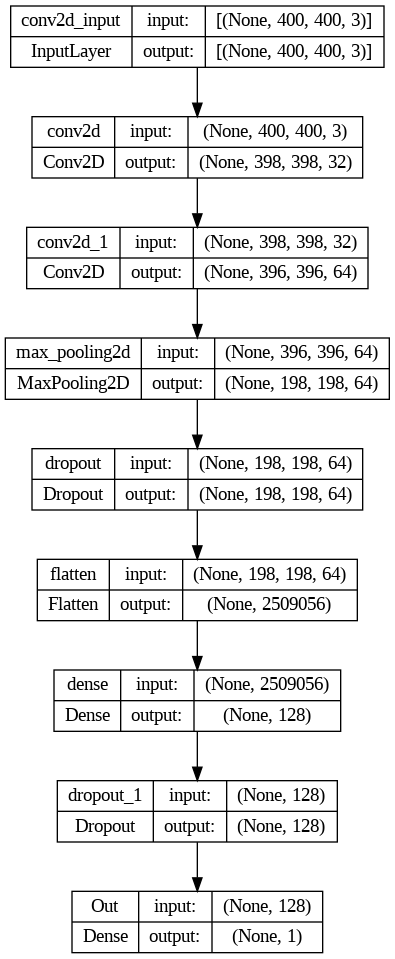

In [ ]:
# 繪製模型架構圖與存檔
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='20231218_O4_Color_All6Feature_CNN_e1000.png')

In [ ]:
# CNN模型訓練
%%time
# 訓練參數 epochs = 1000
history = model.fit(x_train, y_train, epochs=1000, verbose=1)
#verbose: 0 =無顯示, 1 =進度條, 2 =每輪一行。

Epoch 1/1000
12/12 [==============================] - 10s 253ms/step - loss: 62766.3242 - mae: 97.4385
Epoch 2/1000
12/12 [==============================] - 2s 167ms/step - loss: 58.2693 - mae: 6.0494
Epoch 3/1000
12/12 [==============================] - 2s 166ms/step - loss: 24.8738 - mae: 3.8158
Epoch 4/1000
12/12 [==============================] - 2s 166ms/step - loss: 23.0328 - mae: 3.5748
Epoch 5/1000
12/12 [==============================] - 2s 166ms/step - loss: 24.3577 - mae: 3.7693
Epoch 6/1000
12/12 [==============================] - 2s 166ms/step - loss: 20.5354 - mae: 3.4996
Epoch 7/1000
12/12 [==============================] - 2s 167ms/step - loss: 21.6629 - mae: 3.5848
Epoch 8/1000
12/12 [==============================] - 2s 167ms/step - loss: 23.0379 - mae: 3.6067
Epoch 9/1000
12/12 [==============================] - 2s 167ms/step - loss: 20.2437 - mae: 3.4038
Epoch 10/1000
12/12 [==============================] - 2s 166ms/step - loss: 21.0609 - mae: 3.4791
Epoch 11/1000


In [ ]:
pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt

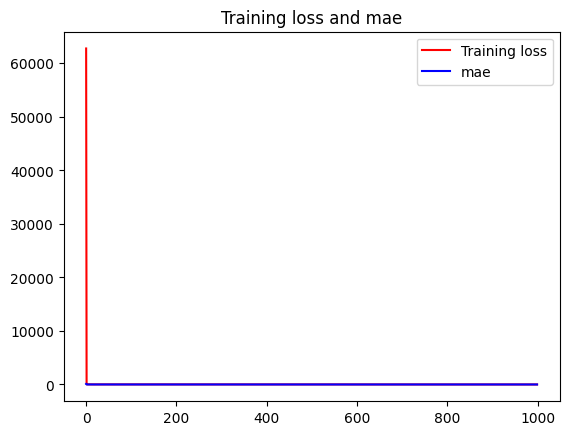

In [ ]:
# 訓練過程LOSS與MAE折線圖
loss = history.history['loss']

mae = history.history['mae']
epochs = list(range(len(loss)))

plt.plot(epochs, loss, 'r', label='Training loss')

plt.plot(epochs, mae, 'b', label='mae')
plt.title('Training loss and mae')
plt.legend()
plt.show()

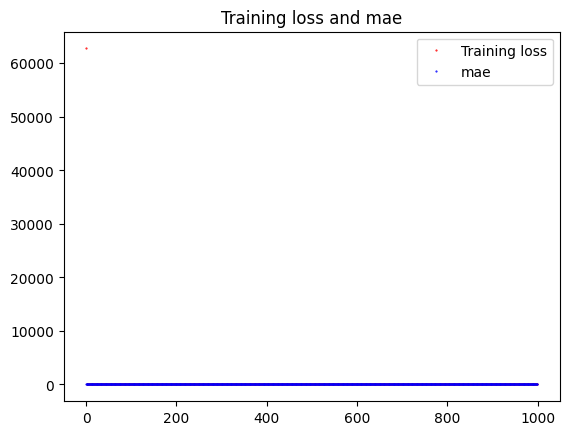

In [ ]:
# 訓練過程LOSS與MAE點狀圖
loss = history.history['loss']

mae = history.history['mae']
epochs = list(range(len(loss)))



plt.plot(epochs, loss, 'o', markersize=0.5, color='r', label='Training loss')

plt.plot(epochs, mae, 'o', markersize=0.5, color='b', label='mae')
plt.title('Training loss and mae')
plt.legend()
plt.show()

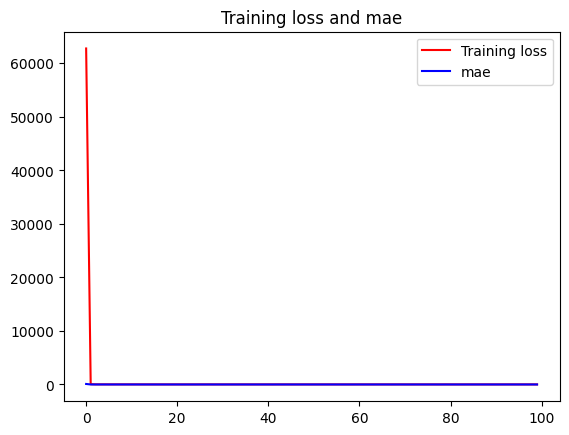

In [ ]:
# 訓練過程LOSS與MAE折線圖(前100epochs)
loss = history.history['loss']

mae = history.history['mae']
epochs = list(range(len(loss)))

plt.plot(epochs[:100], loss[:100], 'r', label='Training loss')

plt.plot(epochs[:100], mae[:100], 'b', label='mae')
plt.title('Training loss and mae')
plt.legend()
plt.show()

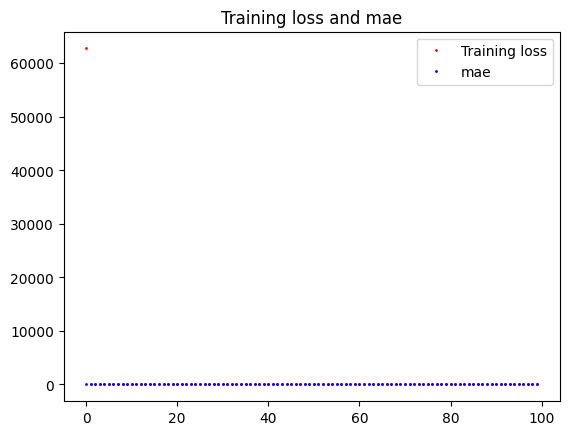

In [ ]:
# 訓練過程LOSS與MAE點狀圖(前100epochs)
loss = history.history['loss']
# val_loss = history.history['val_loss']
mae = history.history['mae']
epochs = list(range(len(loss)))

plt.plot(epochs[:100], loss[:100], 'o', markersize=1, color='r', label='Training loss')

plt.plot(epochs[:100], mae[:100], 'o', markersize=1, color='b', label='mae')
plt.title('Training loss and mae')
plt.legend()
plt.show()

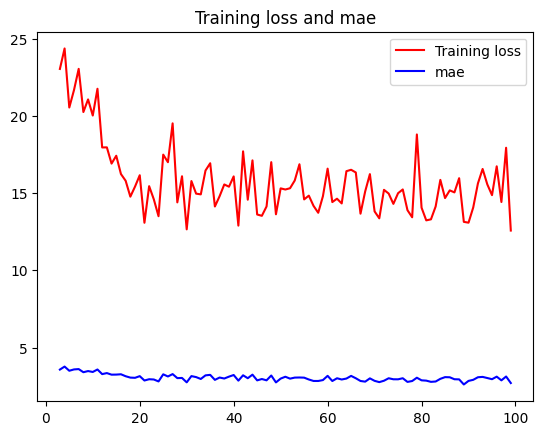

In [ ]:
# 訓練過程LOSS與MAE折線圖(前3-100epochs)
loss = history.history['loss']

mae = history.history['mae']
epochs = list(range(len(loss)))

plt.plot(epochs[3:100], loss[3:100], 'r', label='Training loss')

plt.plot(epochs[3:100], mae[3:100], 'b', label='mae')
plt.title('Training loss and mae')
plt.legend()
plt.show()

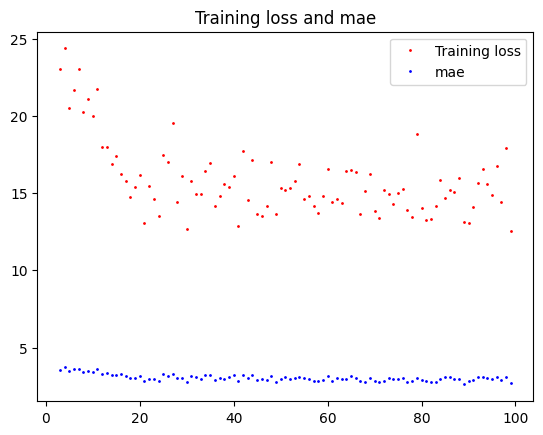

In [ ]:
# 訓練過程LOSS與MAE點狀圖(前3-100epochs)
loss = history.history['loss']

mae = history.history['mae']
epochs = list(range(len(loss)))


plt.plot(epochs[3:100], loss[3:100], 'o', markersize=1, color='r', label='Training loss')

plt.plot(epochs[3:100], mae[3:100], 'o', markersize=1, color='b', label='mae')
plt.title('Training loss and mae')
plt.legend()
plt.show()

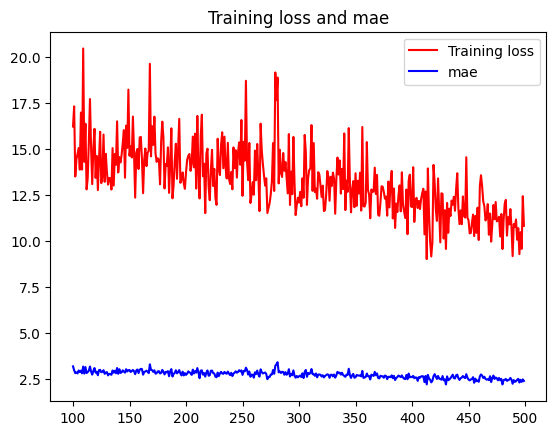

In [ ]:
# 訓練過程LOSS與MAE折線圖(前100-500epochs)
loss = history.history['loss']
# val_loss = history.history['val_loss']
mae = history.history['mae']
epochs = list(range(len(loss)))

# plt.plot(epochs,acc, 'b', label='Training accuracy')
# plt.plot(epochs, val_acc, 'r', label='validation accuracy')
# plt.title('Training and validation accuracy')
# plt.legend(loc='lower right')
# plt.figure()

plt.plot(epochs[100:500], loss[100:500], 'r', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.plot(epochs[100:500], mae[100:500], 'b', label='mae')
plt.title('Training loss and mae')
plt.legend()
plt.show()

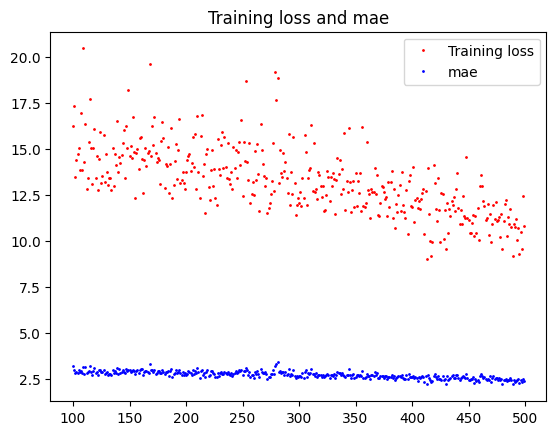

In [ ]:
# 訓練過程LOSS與MAE點狀圖(前100-500epochs)
loss = history.history['loss']
# val_loss = history.history['val_loss']
mae = history.history['mae']
epochs = list(range(len(loss)))

# plt.plot(epochs,acc, 'b', label='Training accuracy')
# plt.plot(epochs, val_acc, 'r', label='validation accuracy')
# plt.title('Training and validation accuracy')
# plt.legend(loc='lower right')
# plt.figure()

plt.plot(epochs[100:500], loss[100:500], 'o', markersize=1, color='r', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.plot(epochs[100:500], mae[100:500], 'o', markersize=1, color='b', label='mae')
plt.title('Training loss and mae')
plt.legend()
plt.show()

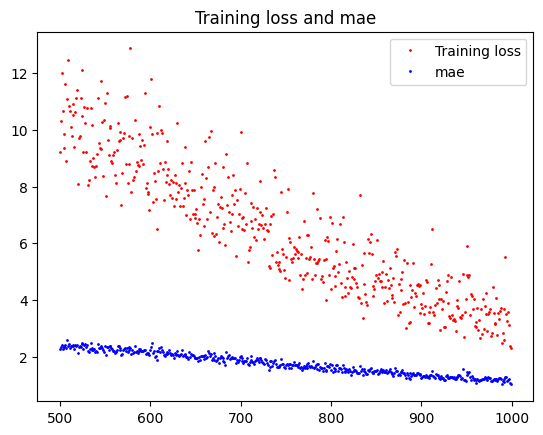

In [ ]:
# 訓練過程LOSS與MAE點狀圖(前500-1000epochs)
loss = history.history['loss']

mae = history.history['mae']
epochs = list(range(len(loss)))

plt.plot(epochs[500:1000], loss[500:1000], 'o', markersize=1, color='r', label='Training loss')

plt.plot(epochs[500:1000], mae[500:1000], 'o', markersize=1, color='b', label='mae')
plt.title('Training loss and mae')
plt.legend()
plt.show()

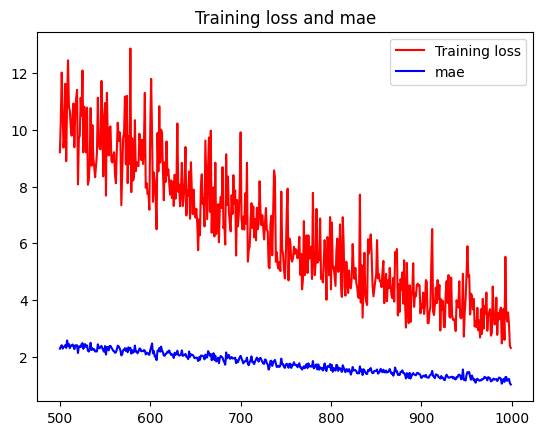

In [ ]:
# 訓練過程LOSS與MAE折線圖(前500-1000epochs)
loss = history.history['loss']

mae = history.history['mae']
epochs = list(range(len(loss)))

plt.plot(epochs[500:1000], loss[500:1000], 'r', label='Training loss')

plt.plot(epochs[500:1000], mae[500:1000], 'b', label='mae')
plt.title('Training loss and mae')
plt.legend()
plt.show()

In [ ]:
# 每一筆資料預測值
y_pred = model.predict(x_test)
y_pred

5/5 [==============================] - 1s 192ms/step


array([[ 7.9257445],
       [ 8.710212 ],
       [ 7.0812206],
       [ 6.569791 ],
       [ 7.6510696],
       [ 9.278593 ],
       [ 6.7486506],
       [ 8.349542 ],
       [ 6.9836917],
       [ 8.807315 ],
       [ 8.1527605],
       [ 7.1975346],
       [ 6.6555686],
       [ 7.91807  ],
       [ 5.798106 ],
       [ 6.710419 ],
       [ 9.897813 ],
       [ 7.4450903],
       [ 6.359687 ],
       [ 6.829652 ],
       [ 6.439268 ],
       [ 7.6088963],
       [ 9.9240055],
       [ 6.3347917],
       [ 8.722992 ],
       [ 7.8751125],
       [ 8.615684 ],
       [ 7.967486 ],
       [ 6.793032 ],
       [ 6.92965  ],
       [ 8.455118 ],
       [ 8.322092 ],
       [ 7.863807 ],
       [ 9.0469265],
       [ 7.409963 ],
       [ 8.565216 ],
       [12.177351 ],
       [10.524895 ],
       [ 8.14278  ],
       [ 8.157379 ],
       [ 8.03853  ],
       [ 7.400652 ],
       [ 7.6481576],
       [ 7.7250776],
       [ 6.819686 ],
       [ 7.1720166],
       [ 6.8758607],
       [ 9.56

In [ ]:
# 模型效能評估指標MSE與MAE
train_result = model.evaluate(x_train,y_train) #Train
test_result = model.evaluate(x_test,y_test) #Test
print(train_result)
print(test_result)

5/5 [==============================] - 0s 41ms/step - loss: 2.3080 - mae: 1.1456
[0.9880440831184387, 0.795882523059845]
[2.3079724311828613, 1.145604133605957]


In [ ]:
# 每一筆test資料之準確值、預測值與誤差值
print("    準確值    預測值         誤差值   ")
for ii in range(len(y_pred)):
  print( "  " + str(ii) + "  " + str(y_test[ii])  + "  "  + str(y_pred[ii])  + "    "  + str(y_test[ii] - y_pred[ii]) )

    準確值    預測值         誤差值   
  0  9.0  [7.9257445]    [1.0742555]
  1  11.6  [8.710212]    [2.8897886]
  2  8.1  [7.0812206]    [1.0187798]
  3  7.4  [6.569791]    [0.83020926]
  4  5.4  [7.6510696]    [-2.2510695]
  5  11.0  [9.278593]    [1.7214069]
  6  6.5  [6.7486506]    [-0.24865055]
  7  10.5  [8.349542]    [2.1504583]
  8  8.7  [6.9836917]    [1.7163081]
  9  10.0  [8.807315]    [1.1926851]
  10  9.7  [8.1527605]    [1.5472393]
  11  7.4  [7.1975346]    [0.20246553]
  12  6.6  [6.6555686]    [-0.0555687]
  13  7.8  [7.91807]    [-0.11806965]
  14  4.8  [5.798106]    [-0.998106]
  15  8.9  [6.710419]    [2.1895804]
  16  9.4  [9.897813]    [-0.49781322]
  17  7.1  [7.4450903]    [-0.3450904]
  18  6.6  [6.359687]    [0.24031305]
  19  8.3  [6.829652]    [1.4703484]
  20  6.6  [6.439268]    [0.16073179]
  21  6.3  [7.6088963]    [-1.3088961]
  22  13.5  [9.9240055]    [3.5759945]
  23  5.3  [6.3347917]    [-1.0347915]
  24  10.0  [8.722992]    [1.277008]
  25  6.3  [7.8751125]  

In [ ]:
# 模型效能test評估指標 MAPE 與 1-MAPE
y_abs_s = 0
for k in range(len(y_test)):
  yy = (y_test[k] - y_pred[k])/y_test[k]
  y_abs = abs(yy)
  print(str(k) + "  " + str(yy) + "  " + str(y_abs))
  y_abs_s = y_abs_s + y_abs
  print(y_abs_s)

print(y_abs_s)
print("誤差率 :", y_abs_s/len(y_test))
print("正確率 :", 1-(y_abs_s/len(y_test)))

0  [0.11936172]  [0.11936172]
[0.11936172]
1  [0.2491197]  [0.2491197]
[0.36848143]
2  [0.12577528]  [0.12577528]
[0.4942567]
3  [0.11219044]  [0.11219044]
[0.60644716]
4  [-0.41686472]  [0.41686472]
[1.0233119]
5  [0.15649153]  [0.15649153]
[1.1798034]
6  [-0.03825393]  [0.03825393]
[1.2180573]
7  [0.20480555]  [0.20480555]
[1.4228628]
8  [0.1972768]  [0.1972768]
[1.6201396]
9  [0.11926851]  [0.11926851]
[1.7394081]
10  [0.15950921]  [0.15950921]
[1.8989173]
11  [0.02736021]  [0.02736021]
[1.9262775]
12  [-0.0084195]  [0.0084195]
[1.934697]
13  [-0.01513713]  [0.01513713]
[1.9498341]
14  [-0.20793875]  [0.20793875]
[2.1577728]
15  [0.24602029]  [0.24602029]
[2.403793]
16  [-0.05295886]  [0.05295886]
[2.456752]
17  [-0.04860428]  [0.04860428]
[2.5053563]
18  [0.03641107]  [0.03641107]
[2.5417674]
19  [0.1771504]  [0.1771504]
[2.7189178]
20  [0.0243533]  [0.0243533]
[2.743271]
21  [-0.20776127]  [0.20776127]
[2.9510324]
22  [0.2648885]  [0.2648885]
[3.215921]
23  [-0.19524367]  [0.19524

In [ ]:
#儲存模型 將模型完整儲存至HDF格式檔案
model.save('20231218_O4_Color_All6Feature_CNN_e1000.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#儲存模型 將模型完整儲存至HDF格式檔案
model.save('20231218_O4_Color_All6Feature_CNN_e1000.h5')

In [ ]:
# 每一筆train資料預測值
y_pred_train = model.predict(x_train)
y_pred_train

12/12 [==============================] - 1s 40ms/step


array([[ 8.686314 ],
       [ 6.7699795],
       [ 6.3037233],
       [ 7.958289 ],
       [ 6.7056146],
       [ 7.3479176],
       [ 8.0791855],
       [10.394175 ],
       [ 6.44348  ],
       [ 6.7949524],
       [ 8.427703 ],
       [ 5.9264393],
       [ 7.7059903],
       [10.730331 ],
       [ 5.7976575],
       [11.937965 ],
       [ 6.8052683],
       [ 7.4658346],
       [ 5.94872  ],
       [ 5.8481135],
       [ 8.172035 ],
       [10.619282 ],
       [ 9.583506 ],
       [ 7.0774717],
       [ 7.092565 ],
       [ 7.7703247],
       [ 8.739673 ],
       [ 7.2138205],
       [ 5.4597344],
       [ 8.808578 ],
       [ 8.217382 ],
       [ 9.081291 ],
       [ 9.201405 ],
       [ 9.457089 ],
       [ 5.7976575],
       [ 5.8336115],
       [ 9.790085 ],
       [ 8.914283 ],
       [ 6.1764984],
       [24.914    ],
       [ 7.093175 ],
       [ 6.75405  ],
       [ 9.526791 ],
       [ 7.6066575],
       [ 5.809255 ],
       [ 7.865343 ],
       [ 8.529088 ],
       [ 5.79

In [ ]:
# 每一筆train資料之準確值、預測值與誤差值
print("    準確值    預測值         誤差值   ")
for ii in range(len(y_pred_train)):
  print( "  " + str(ii) + "  " + str(y_train[ii])  + "  "  + str(y_pred_train[ii])  + "    "  + str(y_train[ii] - y_pred_train[ii]) )

    準確值    預測值         誤差值   
  0  9.4  [8.686314]    [0.713686]
  1  7.4  [6.7699795]    [0.6300206]
  2  6.5  [6.3037233]    [0.19627666]
  3  8.5  [7.958289]    [0.54171085]
  4  6.9  [6.7056146]    [0.19438553]
  5  7.8  [7.3479176]    [0.45208263]
  6  8.5  [8.0791855]    [0.4208145]
  7  11.8  [10.394175]    [1.4058256]
  8  6.6  [6.44348]    [0.15651989]
  9  7.0  [6.7949524]    [0.2050476]
  10  9.4  [8.427703]    [0.9722967]
  11  6.1  [5.9264393]    [0.17356062]
  12  8.2  [7.7059903]    [0.4940095]
  13  11.8  [10.730331]    [1.0696688]
  14  5.0  [5.7976575]    [-0.7976575]
  15  13.4  [11.937965]    [1.4620342]
  16  7.6  [6.8052683]    [0.7947316]
  17  8.4  [7.4658346]    [0.934165]
  18  6.0  [5.94872]    [0.05128002]
  19  5.8  [5.8481135]    [-0.04811335]
  20  9.0  [8.172035]    [0.8279648]
  21  11.8  [10.619282]    [1.1807184]
  22  11.0  [9.583506]    [1.4164944]
  23  7.5  [7.0774717]    [0.42252827]
  24  7.5  [7.092565]    [0.40743494]
  25  8.2  [7.7703247]   

In [ ]:
# 模型效能train評估指標 MAPE 與 1-MAPE
y_abs_s = 0
for k in range(len(y_train)):
  yy = (y_train[k] - y_pred_train[k])/y_train[k]
  y_abs = abs(yy)
  print(str(k) + "  " + str(yy) + "  " + str(y_abs))
  y_abs_s = y_abs_s + y_abs
  print(y_abs_s)

print(y_abs_s)
print("誤差率 :", y_abs_s/len(y_train))
print("正確率 :", 1-(y_abs_s/len(y_train)))

0  [0.07592405]  [0.07592405]
[0.07592405]
1  [0.08513792]  [0.08513792]
[0.16106197]
2  [0.03019641]  [0.03019641]
[0.19125839]
3  [0.06373069]  [0.06373069]
[0.2549891]
4  [0.02817181]  [0.02817181]
[0.2831609]
5  [0.05795931]  [0.05795931]
[0.3411202]
6  [0.04950759]  [0.04950759]
[0.3906278]
7  [0.11913776]  [0.11913776]
[0.50976557]
8  [0.02371513]  [0.02371513]
[0.5334807]
9  [0.02929251]  [0.02929251]
[0.5627732]
10  [0.10343582]  [0.10343582]
[0.66620904]
11  [0.02845256]  [0.02845256]
[0.6946616]
12  [0.06024506]  [0.06024506]
[0.75490665]
13  [0.0906499]  [0.0906499]
[0.84555656]
14  [-0.1595315]  [0.1595315]
[1.0050881]
15  [0.10910703]  [0.10910703]
[1.1141951]
16  [0.10456995]  [0.10456995]
[1.218765]
17  [0.11121012]  [0.11121012]
[1.3299751]
18  [0.00854667]  [0.00854667]
[1.3385218]
19  [-0.0082954]  [0.0082954]
[1.3468173]
20  [0.09199609]  [0.09199609]
[1.4388133]
21  [0.10006088]  [0.10006088]
[1.5388741]
22  [0.12877221]  [0.12877221]
[1.6676464]
23  [0.0563371]  [0

In [ ]:
# 模型效能評估指標
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

print("=================TEST=================")
# mae
print("MAE:", mean_absolute_error(y_test, y_pred))
# mse
print("MSE:", mean_squared_error(y_test, y_pred))
# rmse
n = mean_squared_error(y_test, y_pred)
x = math.sqrt(n)
print("RMSE:", x)
# msle
print("MSLE:", mean_squared_log_error(y_test, y_pred))
#median_absolute_error
print("MEDAE:", median_absolute_error(y_test, y_pred))
# R^2
print("R^2:", r2_score(y_test, y_pred))

print("=================TRAIN=================")
# mae
print("MAE:", mean_absolute_error(y_train, y_pred_train))
# mse
print("MSE:", mean_squared_error(y_train, y_pred_train))
# rmse
n = mean_squared_error(y_train, y_pred_train)
xx = math.sqrt(n)
print("RMSE:", xx)
# msle
print("MSLE:", mean_squared_log_error(y_train, y_pred_train))
#median_absolute_error
print("MEDAE:", median_absolute_error(y_train, y_pred_train))
# R^2
print("R^2:", r2_score(y_train, y_pred_train))

=================TEST=================
MAE: 1.1456042173581245
MSE: 2.3079723952839326
RMSE: 1.51920123594076
MSLE: 0.020899199488374817
MEDAE: 1.0055533409118653
R^2: 0.6840501819324412
=================TRAIN=================
MAE: 0.7958825334087831
MSE: 0.988044052933822
RMSE: 0.9940040507632864
MSLE: 0.008871182913830824
MEDAE: 0.6723197460174557
R^2: 0.8890143500170629


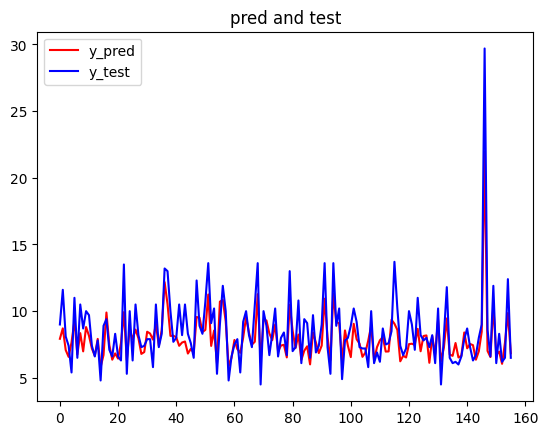

In [ ]:
# test資料預測值與其對應實際值折線圖
item = range(len(y_test))


plt.plot(item, y_pred, 'r', label='y_pred')
# plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.plot(item, y_test, 'b', label='y_test')
plt.title('pred and test')
plt.legend()
plt.show()

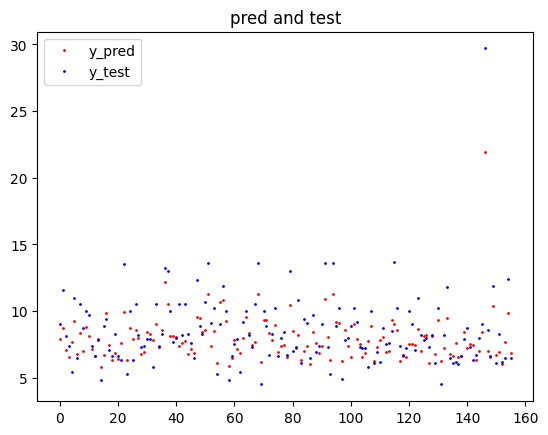

In [ ]:
# test資料預測值與其對應實際值點狀圖
item = range(len(y_test))

plt.plot(item, y_pred, 'o', markersize=1, color='r', label='y_pred')

plt.plot(item, y_test, 'o', markersize=1, color='b', label='y_test')
plt.title('pred and test')
plt.legend()
plt.show()

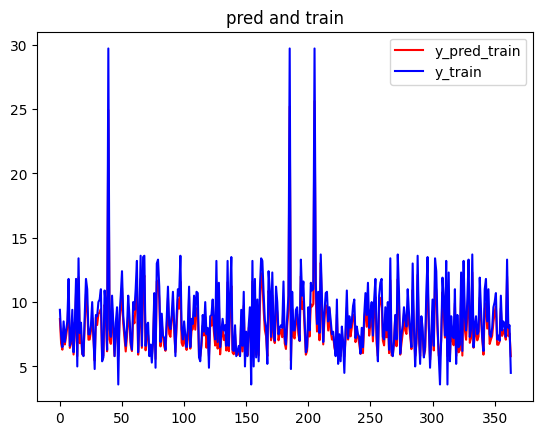

In [ ]:
# train資料預測值與其對應實際值折線圖
item = range(len(y_train))


plt.plot(item, y_pred_train, 'r', label='y_pred_train')

plt.plot(item, y_train, 'b', label='y_train')
plt.title('pred and train')
plt.legend()
plt.show()

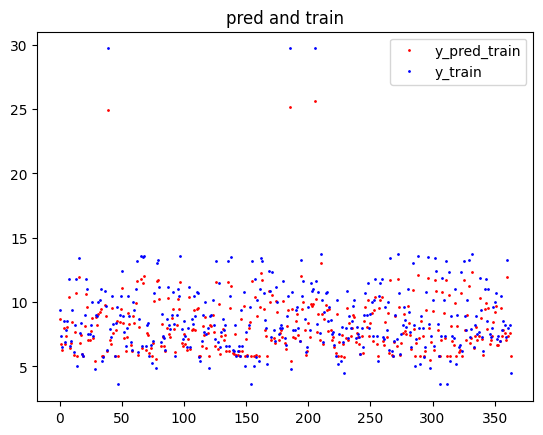

In [ ]:
# train資料預測值與其對應實際值點狀圖
item = range(len(y_train))

# plt.plot(epochs,acc, 'b', label='Training accuracy')
# plt.plot(epochs, val_acc, 'r', label='validation accuracy')
# plt.title('Training and validation accuracy')
# plt.legend(loc='lower right')
# plt.figure()

plt.plot(item, y_pred_train, 'o', markersize=1, color='r', label='y_pred_train')
# plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.plot(item, y_train, 'o', markersize=1, color='b', label='y_train')
plt.title('pred and train')
plt.legend()
plt.show()

In [ ]:
# 每一筆test資料誤差值
print("誤差值")
difference = []

for ii in range(len(y_pred)):
  d = float(y_test[ii]) - float(y_pred[ii])
  print(d)
  difference.append(d)

誤差值
1.0742554664611816
2.889788246154785
1.018779373168945
0.8302091598510746
-2.251069641113281
1.7214069366455078
-0.24865055084228516
2.150458335876465
1.7163083076477044
1.1926851272583008
1.5472394943237298
0.2024654388427738
-0.05556859970092809
-0.11806983947753924
-0.9981061935424806
2.189580821990967
-0.49781284332275355
-0.3450902938842777
0.2403131484985348
1.4703481674194343
0.16073188781738246
-1.3088962554931642
3.5759944915771484
-1.034791660308838
1.277008056640625
-1.5751125335693361
1.8843164443969727
0.23251409530639577
0.5069678306579588
0.4703501701354984
-0.5551181793212887
-0.4220920562744137
-2.0638072013854982
1.453073501586914
-0.10996313095092791
-0.2652160644531243
1.0226490020751946
2.4751052856445312
1.8572196960449219
-0.4573791503906248
-0.03853034973144531
3.0993480682373047
0.5518424034118645
2.7749223709106445
1.4803140640258796
0.4279833793640133
-0.37586069107055664
2.7385576248168952
-0.603266334533691
-0.13527889251708913
2.1085693359374993
2.3495

In [ ]:
# test difference 標準差

print("test difference : " + str(difference))

st_dif = np.std(difference)

print("Standard deviation of the test difference: " + str(st_dif))

test difference : [1.0742554664611816, 2.889788246154785, 1.018779373168945, 0.8302091598510746, -2.251069641113281, 1.7214069366455078, -0.24865055084228516, 2.150458335876465, 1.7163083076477044, 1.1926851272583008, 1.5472394943237298, 0.2024654388427738, -0.05556859970092809, -0.11806983947753924, -0.9981061935424806, 2.189580821990967, -0.49781284332275355, -0.3450902938842777, 0.2403131484985348, 1.4703481674194343, 0.16073188781738246, -1.3088962554931642, 3.5759944915771484, -1.034791660308838, 1.277008056640625, -1.5751125335693361, 1.8843164443969727, 0.23251409530639577, 0.5069678306579588, 0.4703501701354984, -0.5551181793212887, -0.4220920562744137, -2.0638072013854982, 1.453073501586914, -0.10996313095092791, -0.2652160644531243, 1.0226490020751946, 2.4751052856445312, 1.8572196960449219, -0.4573791503906248, -0.03853034973144531, 3.0993480682373047, 0.5518424034118645, 2.7749223709106445, 1.4803140640258796, 0.4279833793640133, -0.37586069107055664, 2.7385576248168952, -0

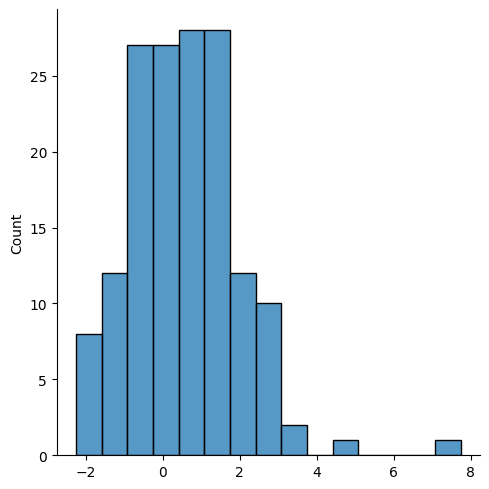

In [ ]:
# test資料各誤差值區間個數長條圖
import seaborn as sns
x = difference
sns.displot(x,aspect = 1)

In [ ]:
# 每一筆train資料誤差值
print("誤差值")
difference_train = []

for ii in range(len(y_pred_train)):
  d = float(y_train[ii]) - float(y_pred_train[ii])
  print(d)
  difference_train.append(d)

誤差值
0.7136863708496097
0.6300205230712894
0.19627666473388672
0.5417108535766602
0.19438543319702184
0.4520824432373045
0.42081451416015625
1.4058254241943366
0.15651998519897425
0.205047607421875
0.9722970962524418
0.17356071472167933
0.4940096855163567
1.0696685791015632
-0.7976574897766113
1.462034606933594
0.7947317123413082
0.9341653823852543
0.05128002166748047
-0.048113536834716975
0.8279647827148438
1.1807182312011726
1.416494369506836
0.4225282669067383
0.40743494033813477
0.4296752929687493
1.2603273391723633
0.18617954254150426
-0.6597344398498537
0.1914224624633789
0.6826175689697269
0.9187088012695312
0.9985954284667962
1.5429105758666992
-0.397657489776611
-0.13361148834228498
1.1099151611328129
0.7857172012329094
0.12350158691406232
4.786000442504882
0.8068250656127933
0.5459502220153807
0.9732093811035156
0.6933424949646003
-0.009255123138427912
0.53465690612793
1.0709119796752926
-2.1976574897766112
0.5390853881835938
1.068704605102539
1.297575378417969
0.5322832107543

In [ ]:
#train difference 標準差

print("train difference : " + str(difference_train))

st_dif = np.std(difference_train)

print("Standard deviation of the train difference: " + str(st_dif))

train difference : [0.7136863708496097, 0.6300205230712894, 0.19627666473388672, 0.5417108535766602, 0.19438543319702184, 0.4520824432373045, 0.42081451416015625, 1.4058254241943366, 0.15651998519897425, 0.205047607421875, 0.9722970962524418, 0.17356071472167933, 0.4940096855163567, 1.0696685791015632, -0.7976574897766113, 1.462034606933594, 0.7947317123413082, 0.9341653823852543, 0.05128002166748047, -0.048113536834716975, 0.8279647827148438, 1.1807182312011726, 1.416494369506836, 0.4225282669067383, 0.40743494033813477, 0.4296752929687493, 1.2603273391723633, 0.18617954254150426, -0.6597344398498537, 0.1914224624633789, 0.6826175689697269, 0.9187088012695312, 0.9985954284667962, 1.5429105758666992, -0.397657489776611, -0.13361148834228498, 1.1099151611328129, 0.7857172012329094, 0.12350158691406232, 4.786000442504882, 0.8068250656127933, 0.5459502220153807, 0.9732093811035156, 0.6933424949646003, -0.009255123138427912, 0.53465690612793, 1.0709119796752926, -2.1976574897766112, 0.5390

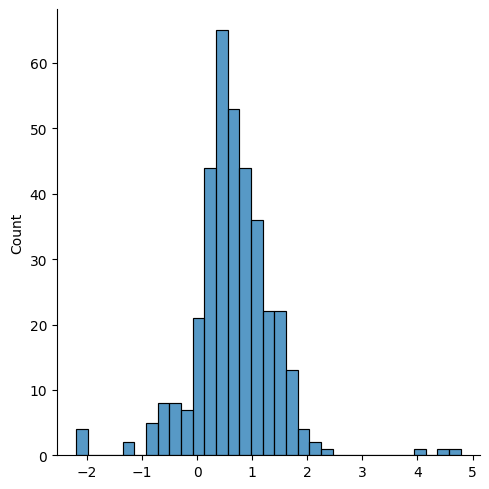

In [ ]:
# train資料各誤差值區間個數長條圖
import seaborn as sns
x = difference_train
sns.displot(x,aspect = 1)

In [ ]:
# 模型的各項特徵係數
model.weights

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 3, 32) dtype=float32, numpy=
 array([[[[ 0.03049855,  0.09827763, -0.04727305,  0.0995523 ,
            0.01465453,  0.06751285, -0.14152472,  0.01639162,
           -0.07305874, -0.11761084,  0.13606085, -0.11917695,
            0.06332   , -0.01750664,  0.14263816,  0.01441088,
           -0.11592929,  0.00115099, -0.12838987, -0.11327909,
           -0.00148103, -0.10944261, -0.0920497 ,  0.07268951,
            0.02430492, -0.14976807,  0.07572442,  0.07629177,
           -0.1134174 ,  0.06039844,  0.08870624,  0.03912603],
          [-0.09301   ,  0.042337  ,  0.03209998, -0.04797137,
           -0.00665056, -0.04459032, -0.03851281, -0.07574908,
            0.06015506, -0.13119829, -0.11063983, -0.10663148,
           -0.05024443,  0.12643293,  0.02501319, -0.09845202,
           -0.12350656, -0.06185751,  0.00382867,  0.06326385,
           -0.11616921,  0.11617979,  0.04423125, -0.0784812 ,
           -0.11555972,  0.10042039, -0.071

In [ ]:
# 模型特徵係數的層數
len(model.weights)

8

In [ ]:
# 讀取模型各層數的特徵係數
aa = list(model.weights)

In [ ]:
# 模型第1層的特徵係數
aa[0]

<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 3, 32) dtype=float32, numpy=
array([[[[ 0.03049855,  0.09827763, -0.04727305,  0.0995523 ,
           0.01465453,  0.06751285, -0.14152472,  0.01639162,
          -0.07305874, -0.11761084,  0.13606085, -0.11917695,
           0.06332   , -0.01750664,  0.14263816,  0.01441088,
          -0.11592929,  0.00115099, -0.12838987, -0.11327909,
          -0.00148103, -0.10944261, -0.0920497 ,  0.07268951,
           0.02430492, -0.14976807,  0.07572442,  0.07629177,
          -0.1134174 ,  0.06039844,  0.08870624,  0.03912603],
         [-0.09301   ,  0.042337  ,  0.03209998, -0.04797137,
          -0.00665056, -0.04459032, -0.03851281, -0.07574908,
           0.06015506, -0.13119829, -0.11063983, -0.10663148,
          -0.05024443,  0.12643293,  0.02501319, -0.09845202,
          -0.12350656, -0.06185751,  0.00382867,  0.06326385,
          -0.11616921,  0.11617979,  0.04423125, -0.0784812 ,
          -0.11555972,  0.10042039, -0.07140557, -0.046211

In [ ]:
aaa = list(aa[0])

In [ ]:
# 模型第1層的特徵係數個數
len(aaa)

3

In [ ]:
# 模型第2層的特徵係數
aa[1]

<tf.Variable 'conv2d/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.00508031, -0.009033  , -0.06958092, -0.01062754, -0.00157677,
       -0.00807908, -0.01215605, -0.03353848, -0.01134647, -0.01398476,
       -0.00252318, -0.00492336, -0.00799178,  0.00210241, -0.0134258 ,
       -0.05163119,  0.        ,  0.00086047, -0.02154743, -0.00571784,
       -0.04196045, -0.04128533, -0.00760116, -0.00690824, -0.03101697,
       -0.01024107, -0.0266483 , -0.00855207, -0.00166431, -0.00295309,
       -0.01062705, -0.01470826], dtype=float32)>

In [ ]:
aaa = list(aa[1])

In [ ]:
# 模型第2層的特徵係數個數
len(aaa)

32

In [ ]:
# 模型第6層的特徵係數
aa[5]

<tf.Variable 'dense/bias:0' shape=(128,) dtype=float32, numpy=
array([-0.00639873, -0.00600531, -0.00654329, -0.00512612, -0.00534701,
       -0.0064301 ,  0.07631443, -0.00600546, -0.00511   , -0.00656322,
       -0.00555885, -0.0077686 , -0.00683895, -0.00600546, -0.0049216 ,
       -0.00600545, -0.00600543, -0.00803704, -0.00600546, -0.00600545,
       -0.00600545, -0.00745948, -0.00601949, -0.00600501, -0.00600531,
       -0.00636144, -0.00566188,  0.00565815, -0.00667748, -0.00590881,
       -0.00748496, -0.00668223, -0.00546271, -0.00600541, -0.00613361,
       -0.00600538, -0.00600543, -0.00600546, -0.00600538, -0.00640968,
       -0.00618552,  0.08332428, -0.00600546, -0.00600546, -0.00643423,
       -0.00513106, -0.00600546, -0.00600538, -0.00600546, -0.00672485,
       -0.00661316, -0.00600538, -0.00551356, -0.00200198, -0.00590317,
       -0.00555885, -0.00600545, -0.00568665, -0.00619004, -0.0054762 ,
       -0.00543693, -0.00600542, -0.00678249, -0.0060054 , -0.00511308,
 

In [ ]:
aaa = list(aa[5])

In [ ]:
# 模型第6層的特徵係數個數
len(aaa)

128

In [ ]:
# 模型第7層的特徵係數
aa[6]

<tf.Variable 'Out/kernel:0' shape=(128, 1) dtype=float32, numpy=
array([[ 1.60377234e-01],
       [-6.00340180e-02],
       [ 1.30796507e-01],
       [-1.20106012e-01],
       [ 7.98017755e-02],
       [ 5.57625666e-02],
       [ 6.64812550e-02],
       [-1.09231524e-01],
       [-1.61330029e-01],
       [ 1.52219087e-01],
       [ 2.08510771e-01],
       [ 8.95627812e-02],
       [ 9.95736048e-02],
       [-1.86293140e-01],
       [-1.74751226e-02],
       [-1.00986242e-01],
       [-3.19196470e-02],
       [-1.10410433e-03],
       [-1.40633747e-01],
       [-8.24606046e-02],
       [-9.01031196e-02],
       [ 1.37719825e-01],
       [ 1.93594381e-01],
       [-1.38293700e-02],
       [-7.86833744e-03],
       [ 3.39708738e-02],
       [ 1.17017843e-01],
       [-6.63946569e-02],
       [ 1.10902995e-01],
       [ 5.02874590e-02],
       [ 2.32073255e-02],
       [ 3.45280468e-02],
       [ 1.96330190e-01],
       [-2.06546690e-02],
       [ 5.89331351e-02],
       [-8.50351620e-03],

In [ ]:
aaa = list(aa[6])

In [ ]:
# 模型第7層的特徵係數個數
len(aaa)

128

In [ ]:
# 模型第8層的特徵係數
aa[7]

<tf.Variable 'Out/bias:0' shape=(1,) dtype=float32, numpy=array([5.7976575], dtype=float32)>

In [ ]:
aaa = list(aa[7])

In [ ]:
# 模型第8層的特徵係數個數
len(aaa)

1

# **輸出模型預測結果CSV_e自動**




In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# df = pd.read_csv("data.csv", index_col=0)
df = pd.read_csv("/content/drive/MyDrive//Oyster_data(130)X4.csv")
df

,牡蠣索引 Oyster Index,牡蠣原始編號 Oyster Original Number,右殼長 Right Shell Length,左殼長 Left Shell Length,殼寬 Shell Width,殼高 Shell Height,面積 Area,體積 Volume,總重量 Total Weight,殼重 Shell Weight,肉重占總重量百分比(%) The proportion of Meat Weight in Total Weight(%),雜質重 Impurity Weight,肉重 Meat Weight
0,1,1,6.9,7.8,4.1,2.5,31.98,79.950,28.1,20.7,0.256228,0.2,7.2
1,2,2,6.3,7.8,5.2,3.6,40.56,146.016,50.0,42.4,0.180000,-1.4,9.0
2,3,3,9.1,10.5,4.6,2.1,48.30,101.430,38.0,27.1,0.281579,0.2,10.7
3,4,4,6.7,8.2,4.3,2.4,35.26,84.624,34.6,24.8,0.303468,-0.7,10.5
4,5,5,6.4,7.8,3.8,2.3,29.64,68.172,25.9,20.0,0.250965,-0.6,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,516,126,7.3,8.4,4.1,1.6,34.44,55.104,30.9,22.1,0.281553,0.1,8.7
516,517,127,6.9,7.5,4.6,2.3,34.50,79.350,30.6,20.8,0.297386,0.7,9.1
517,518,128,7.6,8.4,3.7,1.6,31.08,49.728,23.2,15.7,0.280172,1.0,6.5
518,519,129,6.8,8.3,4.4,2.2,36.52,80.344,34.6,23.5,0.294798,0.9,10.2


In [ ]:
# y = df.iloc[:,-1].values
yy = df.iloc[:,:].values

In [ ]:
from sklearn.model_selection import train_test_split

yy_train, yy_test = train_test_split(yy,test_size=3/10,random_state=0)

In [ ]:
import csv
with open("20231218_O4_Color_All6Feature_CNN_e1000_test_data.csv", "w", newline="") as csvfile:
  writer = csv.writer(csvfile)
  # "牡蠣索引 Oyster Index",	"牡蠣編號 Oyster Number",	"牡蠣原始編號 Oyster Original Number",	"殼長 Shell Length",	"殼寬 Shell Width",	"殼高 Shell Height",	"面積 Area",	"體積 Volume",	"總重量 Total Weight",	"殼重 Shell Weight",	"肉重占總重量百分比(%) The proportion of Meat Weight in Total Weight(%)",	"雜質重 Impurity Weight",	"肉重 Meat Weight",
  writer.writerow(['牡蠣索引 Oyster Index', "牡蠣原始編號 Oyster Original Number", "右殼長 Right Shell Length", "左殼長 Left Shell Length",	"殼寬 Shell Width",	"殼高 Shell Height", "面積 Area", "體積 Volume",	"總重量 Total Weight", "殼重 Shell Weight", "肉重占總重量百分比(%) The proportion of Meat Weight in Total Weight(%)", "雜質重 Impurity Weight", "肉重 Meat Weight", "準確值 Accurate value", "預測值 Predicted value", "誤差值 Error value"])
  for ind in range(len(yy_test)):
    yy_test_ind = list(yy_test[ind])
    # yy_test_ind.append(yy_test[ind][1]*yy_test[ind][2]) #面積
    # yy_test_ind.append(yy_test[ind][1]*yy_test[ind][2]*yy_test[ind][3]) #體積
    yy_test_ind.append(y_test[ind]) #準確值
    yy_test_ind.append(float(y_pred[ind])) #預測值
    yy_test_ind.append(float(y_test[ind] - y_pred[ind])) #誤差值
    writer.writerow(yy_test_ind)

  writer.writerow(["Standard deviation of the test difference:", np.std(difference)])



    # writer.writerow([1, 2, 3])
    # writer.writerow([4, 5, 6])
    # writer.writerow([7, 8, 9])

In [ ]:
import csv
with open("20231218_O4_Color_All6Feature_CNN_e1000_test_data.csv", "r", newline="") as csvfile:
  reader = csv.reader(csvfile)
  for row in reader:
    print(row) # row 是 List 的型態，可以用 print(row[0], row[1], row[2]) 分別取得印出

['牡蠣索引 Oyster Index', '牡蠣原始編號 Oyster Original Number', '右殼長 Right Shell Length', '左殼長 Left Shell Length', '殼寬 Shell Width', '殼高 Shell Height', '面積 Area', '體積 Volume', '總重量 Total Weight', '殼重 Shell Weight', '肉重占總重量百分比(%) The proportion of Meat Weight in Total Weight(%)', '雜質重 Impurity Weight', '肉重 Meat Weight', '準確值 Accurate value', '預測值 Predicted value', '誤差值 Error value']
['423.0', '33.0', '5.5', '6.4', '4.2', '2.1', '26.88', '56.448', '32.4', '22.5', '0.277777778', '0.9', '9.0', '9.0', '7.925744533538818', '1.0742554664611816']
['108.0', '108.0', '6.6', '7.5', '4.4', '2.4', '33.0', '79.2', '35.8', '22.9', '0.324022346', '1.3', '11.6', '11.6', '8.710211753845215', '2.8897886276245117']
['254.0', '124.0', '6.0', '6.0', '3.9', '2.4', '23.4', '56.16', '28.8', '19.6', '0.28125', '1.1', '8.1', '8.1', '7.081220626831055', '1.0187797546386719']
['236.0', '106.0', '7.2', '8.3', '3.7', '2.0', '30.71', '61.42', '25.5', '17.5', '0.290196078', '0.6', '7.4', '7.4', '6.569790840148926', '0.83020925

In [ ]:
import csv
with open("20231218_O4_Color_All6Feature_CNN_e1000_train_data.csv", "w", newline="") as csvfile:
  writer = csv.writer(csvfile)
  writer.writerow(["牡蠣索引 Oyster Index", "牡蠣原始編號 Oyster Original Number", "右殼長 Right Shell Length", "左殼長 Left Shell Length",	"殼寬 Shell Width",	"殼高 Shell Height", "面積 Area", "體積 Volume",	"總重量 Total Weight", "殼重 Shell Weight", "肉重占總重量百分比(%) The proportion of Meat Weight in Total Weight(%)", "雜質重 Impurity Weight", "肉重 Meat Weight", "準確值 Accurate value", "預測值 Predicted value", "誤差值 Error value"])
  for ind in range(len(yy_train)):
    yy_train_ind = list(yy_train[ind])
    # yy_train_ind.append(yy_train[ind][1]*yy_train[ind][2]) #面積
    # yy_train_ind.append(yy_train[ind][1]*yy_train[ind][2]*yy_train[ind][3]) #體積
    yy_train_ind.append(y_train[ind]) #準確值
    yy_train_ind.append(float(y_pred_train[ind])) #預測值
    yy_train_ind.append(float(y_train[ind] - y_pred_train[ind])) #誤差值
    writer.writerow(yy_train_ind)

  writer.writerow(["Standard deviation of the train difference:", np.std(difference_train)])



    # writer.writerow([1, 2, 3])
    # writer.writerow([4, 5, 6])
    # writer.writerow([7, 8, 9])

In [ ]:
import csv
with open("20231218_O4_Color_All6Feature_CNN_e1000_train_data.csv", "r", newline="") as csvfile:
  reader = csv.reader(csvfile)
  for row in reader:
    print(row) # row 是 List 的型態，可以用 print(row[0], row[1], row[2]) 分別取得印出

['牡蠣索引 Oyster Index', '牡蠣原始編號 Oyster Original Number', '右殼長 Right Shell Length', '左殼長 Left Shell Length', '殼寬 Shell Width', '殼高 Shell Height', '面積 Area', '體積 Volume', '總重量 Total Weight', '殼重 Shell Weight', '肉重占總重量百分比(%) The proportion of Meat Weight in Total Weight(%)', '雜質重 Impurity Weight', '肉重 Meat Weight', '準確值 Accurate value', '預測值 Predicted value', '誤差值 Error value']
['458.0', '68.0', '8.5', '9.6', '5.0', '2.1', '48.0', '100.8', '44.7', '34.5', '0.210290828', '0.8', '9.4', '9.4', '8.68631362915039', '0.7136859893798828']
['430.0', '40.0', '6.0', '7.0', '4.5', '1.5', '31.5', '47.25', '25.8', '17.0', '0.286821705', '1.4', '7.4', '7.4', '6.769979476928711', '0.6300206184387207']
['395.0', '5.0', '6.4', '7.8', '3.8', '2.3', '29.64', '68.172', '25.9', '20.0', '0.250965251', '-0.6', '6.5', '6.5', '6.303723335266113', '0.19627666473388672']
['6.0', '6.0', '7.4', '8.4', '4.1', '2.3', '34.44', '79.212', '33.4', '24.8', '0.254491018', '0.1', '8.5', '8.5', '7.95828914642334', '0.54171085357

In [ ]:
# test資料CNN模型結果表
df_test = pd.read_csv("20231218_O4_Color_All6Feature_CNN_e1000_test_data.csv")
df_test

,牡蠣索引 Oyster Index,牡蠣原始編號 Oyster Original Number,右殼長 Right Shell Length,左殼長 Left Shell Length,殼寬 Shell Width,殼高 Shell Height,面積 Area,體積 Volume,總重量 Total Weight,殼重 Shell Weight,肉重占總重量百分比(%) The proportion of Meat Weight in Total Weight(%),雜質重 Impurity Weight,肉重 Meat Weight,準確值 Accurate value,預測值 Predicted value,誤差值 Error value
0,423.0,33.000000,5.5,6.4,4.2,2.1,26.88,56.448,32.4,22.5,0.277778,0.9,9.0,9.0,7.925745,1.074255
1,108.0,108.000000,6.6,7.5,4.4,2.4,33.00,79.200,35.8,22.9,0.324022,1.3,11.6,11.6,8.710212,2.889789
2,254.0,124.000000,6.0,6.0,3.9,2.4,23.40,56.160,28.8,19.6,0.281250,1.1,8.1,8.1,7.081221,1.018780
3,236.0,106.000000,7.2,8.3,3.7,2.0,30.71,61.420,25.5,17.5,0.290196,0.6,7.4,7.4,6.569791,0.830209
4,312.0,52.000000,7.1,8.1,3.7,2.7,29.97,80.919,27.9,22.3,0.193548,0.2,5.4,5.4,7.651070,-2.251070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,75.0,75.000000,6.6,7.4,3.8,1.8,28.12,50.616,27.5,20.4,0.225455,0.9,6.2,6.2,6.046987,0.153013
153,27.0,27.000000,7.4,8.3,4.6,1.9,38.18,72.542,35.5,28.9,0.183099,0.1,6.5,6.5,7.648569,-1.148569
154,214.0,84.000000,7.8,9.0,4.5,2.5,40.50,101.250,43.8,28.2,0.283105,3.2,12.4,12.4,9.854370,2.545630
155,5.0,5.000000,6.4,7.8,3.8,2.3,29.64,68.172,25.9,20.0,0.250965,-0.6,6.5,6.5,6.843731,-0.343731


In [ ]:
# train資料CNN模型結果表
df_train = pd.read_csv("20231218_O4_Color_All6Feature_CNN_e1000_train_data.csv")
df_train

,牡蠣索引 Oyster Index,牡蠣原始編號 Oyster Original Number,右殼長 Right Shell Length,左殼長 Left Shell Length,殼寬 Shell Width,殼高 Shell Height,面積 Area,體積 Volume,總重量 Total Weight,殼重 Shell Weight,肉重占總重量百分比(%) The proportion of Meat Weight in Total Weight(%),雜質重 Impurity Weight,肉重 Meat Weight,準確值 Accurate value,預測值 Predicted value,誤差值 Error value
0,458.0,68.000000,8.5,9.6,5.0,2.1,48.00,100.800,44.7,34.5,0.210291,0.8,9.4,9.4,8.686314,0.713686
1,430.0,40.000000,6.0,7.0,4.5,1.5,31.50,47.250,25.8,17.0,0.286822,1.4,7.4,7.4,6.769979,0.630021
2,395.0,5.000000,6.4,7.8,3.8,2.3,29.64,68.172,25.9,20.0,0.250965,-0.6,6.5,6.5,6.303723,0.196277
3,6.0,6.000000,7.4,8.4,4.1,2.3,34.44,79.212,33.4,24.8,0.254491,0.1,8.5,8.5,7.958289,0.541711
4,142.0,12.000000,5.9,6.6,4.3,2.2,28.38,62.436,28.6,21.9,0.241259,-0.2,6.9,6.9,6.705615,0.194386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,278.0,18.000000,8.1,9.3,4.8,2.1,44.64,93.744,53.5,40.0,0.248598,0.2,13.3,13.3,11.985868,1.314132
361,10.0,10.000000,8.4,8.4,4.4,1.8,36.96,66.528,31.8,23.3,0.251572,0.5,8.0,8.0,7.347605,0.652395
362,360.0,100.000000,7.5,8.6,4.1,2.3,35.26,81.098,34.3,25.0,0.239067,1.1,8.2,8.2,7.572949,0.627051
363,193.0,63.000000,7.5,8.5,3.8,1.7,32.30,54.910,21.1,16.3,0.213270,0.3,4.5,4.5,5.797657,-1.297657


# **依據實際重量由小到大排序與其預測重量做分析_sklearn.linear_model**

In [ ]:
def BubbleSort(data,data2):
    n = len(data)
    while n > 1:
        n-=1
        for i in range(n):
            if data[i] > data[i+1]:
                data[i], data[i+1] = data[i+1], data[i]
                data2[i], data2[i+1] = data2[i+1], data2[i]
    return data,data2

In [ ]:
y_test.shape

(156,)

In [ ]:
y_test

array([ 9. , 11.6,  8.1,  7.4,  5.4, 11. ,  6.5, 10.5,  8.7, 10. ,  9.7,
        7.4,  6.6,  7.8,  4.8,  8.9,  9.4,  7.1,  6.6,  8.3,  6.6,  6.3,
       13.5,  5.3, 10. ,  6.3, 10.5,  8.2,  7.3,  7.4,  7.9,  7.9,  5.8,
       10.5,  7.3,  8.3, 13.2, 13. , 10. ,  7.7,  8. , 10.5,  8.2, 10.5,
        8.3,  7.6,  6.5, 12.3,  8.9,  8.3, 10.7, 13.6,  9.1, 10.2,  5.3,
        9. , 11.9, 10. ,  4.8,  6.6,  7.5,  7.9,  5.4,  9.2, 10. ,  8.2,
        7.3, 10.5, 13.6,  4.5, 10. ,  8.9,  6.7,  8.3, 10.2,  6.6,  8. ,
        8.4,  6.7, 13. ,  7. ,  7.3, 10.8,  6.1,  9.4,  9.1,  6.5,  9.7,
        6.9,  7.4,  9. , 13.6,  7.3,  5.3, 13.6,  8.9, 10.2,  4.9,  7.8,
        8. ,  8.9, 10.2,  9.2,  7.3,  7.2,  7.2,  5.8, 10. ,  6.1,  6.9,
        6.2,  8.7,  7.5,  7.6,  8.5, 13.7, 10.2,  7.4,  6.7,  7.2, 10. ,
        9. ,  7.1, 11. ,  8.2,  7.8,  8. ,  7.3,  8.2,  6.1, 10.2,  4.5,
        8.2, 11.8,  6.5,  6.1,  6.2,  6. ,  6.6,  7.9,  8.7,  7.3,  6.3,
        6.7,  8. ,  9. , 29.7,  8.6,  6.6, 11.9,  6

In [ ]:
y_pred.shape

(156, 1)

In [ ]:
y_pred

array([[ 7.9257445],
       [ 8.710212 ],
       [ 7.0812206],
       [ 6.569791 ],
       [ 7.6510696],
       [ 9.278593 ],
       [ 6.7486506],
       [ 8.349542 ],
       [ 6.9836917],
       [ 8.807315 ],
       [ 8.1527605],
       [ 7.1975346],
       [ 6.6555686],
       [ 7.91807  ],
       [ 5.798106 ],
       [ 6.710419 ],
       [ 9.897813 ],
       [ 7.4450903],
       [ 6.359687 ],
       [ 6.829652 ],
       [ 6.439268 ],
       [ 7.6088963],
       [ 9.9240055],
       [ 6.3347917],
       [ 8.722992 ],
       [ 7.8751125],
       [ 8.615684 ],
       [ 7.967486 ],
       [ 6.793032 ],
       [ 6.92965  ],
       [ 8.455118 ],
       [ 8.322092 ],
       [ 7.863807 ],
       [ 9.0469265],
       [ 7.409963 ],
       [ 8.565216 ],
       [12.177351 ],
       [10.524895 ],
       [ 8.14278  ],
       [ 8.157379 ],
       [ 8.03853  ],
       [ 7.400652 ],
       [ 7.6481576],
       [ 7.7250776],
       [ 6.819686 ],
       [ 7.1720166],
       [ 6.8758607],
       [ 9.56

In [ ]:
y_test_sort = y_test.reshape(y_test.shape[0])
y_pred_sort = y_pred.reshape(y_pred.shape[0])

In [ ]:
y_test_sort.shape

(156,)

In [ ]:
y_pred_sort.shape

(156,)

In [ ]:
y_test_sort

array([ 9. , 11.6,  8.1,  7.4,  5.4, 11. ,  6.5, 10.5,  8.7, 10. ,  9.7,
        7.4,  6.6,  7.8,  4.8,  8.9,  9.4,  7.1,  6.6,  8.3,  6.6,  6.3,
       13.5,  5.3, 10. ,  6.3, 10.5,  8.2,  7.3,  7.4,  7.9,  7.9,  5.8,
       10.5,  7.3,  8.3, 13.2, 13. , 10. ,  7.7,  8. , 10.5,  8.2, 10.5,
        8.3,  7.6,  6.5, 12.3,  8.9,  8.3, 10.7, 13.6,  9.1, 10.2,  5.3,
        9. , 11.9, 10. ,  4.8,  6.6,  7.5,  7.9,  5.4,  9.2, 10. ,  8.2,
        7.3, 10.5, 13.6,  4.5, 10. ,  8.9,  6.7,  8.3, 10.2,  6.6,  8. ,
        8.4,  6.7, 13. ,  7. ,  7.3, 10.8,  6.1,  9.4,  9.1,  6.5,  9.7,
        6.9,  7.4,  9. , 13.6,  7.3,  5.3, 13.6,  8.9, 10.2,  4.9,  7.8,
        8. ,  8.9, 10.2,  9.2,  7.3,  7.2,  7.2,  5.8, 10. ,  6.1,  6.9,
        6.2,  8.7,  7.5,  7.6,  8.5, 13.7, 10.2,  7.4,  6.7,  7.2, 10. ,
        9. ,  7.1, 11. ,  8.2,  7.8,  8. ,  7.3,  8.2,  6.1, 10.2,  4.5,
        8.2, 11.8,  6.5,  6.1,  6.2,  6. ,  6.6,  7.9,  8.7,  7.3,  6.3,
        6.7,  8. ,  9. , 29.7,  8.6,  6.6, 11.9,  6

In [ ]:
y_pred_sort

array([ 7.9257445,  8.710212 ,  7.0812206,  6.569791 ,  7.6510696,
        9.278593 ,  6.7486506,  8.349542 ,  6.9836917,  8.807315 ,
        8.1527605,  7.1975346,  6.6555686,  7.91807  ,  5.798106 ,
        6.710419 ,  9.897813 ,  7.4450903,  6.359687 ,  6.829652 ,
        6.439268 ,  7.6088963,  9.9240055,  6.3347917,  8.722992 ,
        7.8751125,  8.615684 ,  7.967486 ,  6.793032 ,  6.92965  ,
        8.455118 ,  8.322092 ,  7.863807 ,  9.0469265,  7.409963 ,
        8.565216 , 12.177351 , 10.524895 ,  8.14278  ,  8.157379 ,
        8.03853  ,  7.400652 ,  7.6481576,  7.7250776,  6.819686 ,
        7.1720166,  6.8758607,  9.561442 ,  9.503266 ,  8.435279 ,
        8.591431 , 11.250414 ,  7.3928733,  8.545411 ,  6.07827  ,
       10.71213  , 10.841352 ,  9.238514 ,  5.861983 ,  6.5061526,
        7.838254 ,  7.155711 ,  6.87661  ,  8.00512  ,  9.558551 ,
        8.383133 ,  7.486168 ,  7.7057657, 11.272022 ,  6.197484 ,
        9.30864  ,  9.300762 ,  8.336457 ,  7.822426 ,  8.9979

In [ ]:
# y_pred_train_sort = list(y_pred_train)

BubbleSort(y_test_sort,y_pred_sort)

print(y_test_sort)
print(y_pred_sort)

[ 4.5  4.5  4.8  4.8  4.9  5.3  5.3  5.3  5.4  5.4  5.8  5.8  6.   6.1
  6.1  6.1  6.1  6.1  6.2  6.2  6.2  6.3  6.3  6.3  6.5  6.5  6.5  6.5
  6.5  6.5  6.6  6.6  6.6  6.6  6.6  6.6  6.6  6.7  6.7  6.7  6.7  6.9
  6.9  7.   7.1  7.1  7.2  7.2  7.2  7.3  7.3  7.3  7.3  7.3  7.3  7.3
  7.3  7.4  7.4  7.4  7.4  7.4  7.5  7.5  7.6  7.6  7.7  7.8  7.8  7.8
  7.9  7.9  7.9  7.9  8.   8.   8.   8.   8.   8.1  8.2  8.2  8.2  8.2
  8.2  8.2  8.3  8.3  8.3  8.3  8.3  8.3  8.4  8.5  8.6  8.7  8.7  8.7
  8.9  8.9  8.9  8.9  8.9  9.   9.   9.   9.   9.   9.1  9.1  9.2  9.2
  9.4  9.4  9.7  9.7 10.  10.  10.  10.  10.  10.  10.  10.  10.2 10.2
 10.2 10.2 10.2 10.2 10.5 10.5 10.5 10.5 10.5 10.5 10.7 10.8 11.  11.
 11.6 11.8 11.9 11.9 12.3 12.4 13.  13.  13.2 13.5 13.6 13.6 13.6 13.6
 13.7 29.7]
[ 6.197484   6.2464023  5.798106   5.861983   6.266542   6.3347917
  6.07827    6.3344207  7.6510696  6.87661    7.863807   7.7978635
  6.527154   6.3363705  6.2841845  6.775583   6.64509    6.728077
  7.8106

In [ ]:
pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt

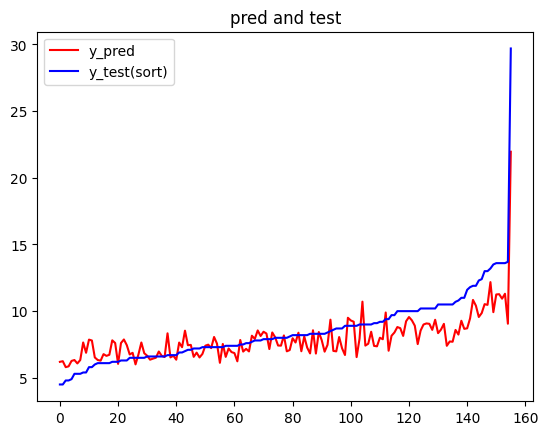

In [ ]:
# test資料預測值與其對應實際值折線圖(依據實際重量由小到大排序)
item = range(len(y_test))

plt.plot(item, y_pred, 'r', label='y_pred')

plt.plot(item, y_test, 'b', label='y_test(sort)')
plt.title('pred and test')
plt.legend()
plt.show()

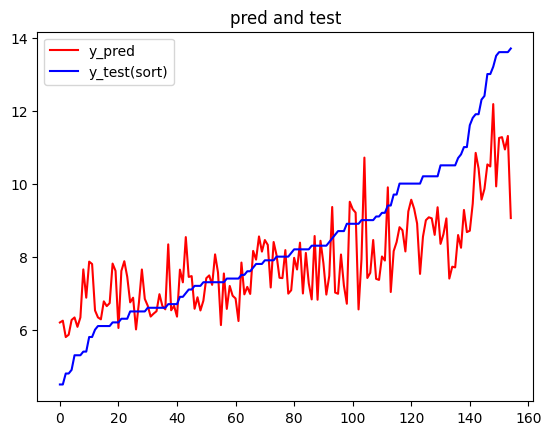

In [ ]:
# test資料預測值與其對應實際值折線圖(依據實際重量由小到大排序)(去除極端值)
item = range(len(y_test)-1)


plt.plot(item, y_pred[:-1], 'r', label='y_pred')

plt.plot(item, y_test[:-1], 'b', label='y_test(sort)')
plt.title('pred and test')
plt.legend()
plt.show()

**train**

In [ ]:
y_train_sort = y_train.reshape(y_train.shape[0])
y_pred_train_sort = y_pred_train.reshape(y_pred_train.shape[0])

In [ ]:
y_train_sort.shape

(364,)

In [ ]:
y_pred_train_sort.shape

(364,)

In [ ]:
y_train_sort

array([ 9.4,  7.4,  6.5,  8.5,  6.9,  7.8,  8.5, 11.8,  6.6,  7. ,  9.4,
        6.1,  8.2, 11.8,  5. , 13.4,  7.6,  8.4,  6. ,  5.8,  9. , 11.8,
       11. ,  7.5,  7.5,  8.2, 10. ,  7.4,  4.8,  9. ,  8.9, 10. , 10.2,
       11. ,  5.4,  5.7, 10.9,  9.7,  6.3, 29.7,  7.9,  7.3, 10.5,  8.3,
        5.8,  8.4,  9.6,  3.6,  9. , 10.5, 12.4,  8.9,  7.7,  6.6,  8. ,
       10.5,  8.9,  6.9,  6.3, 10. ,  9.4, 11. , 13.2,  6.1,  8.7, 13.6,
        6.6, 13.5, 13.6,  6.6,  8.2,  8.4,  5.8,  6.7,  5.3,  7. , 10.7,
        4.9, 13. , 13.3, 11.2,  6.9,  9.1,  7.4,  7.2,  6.3,  8.7, 11.2,
        8.2,  7.9,  9. , 10.8,  8.3,  5.8,  9. , 11. , 10.5, 13.6,  7.9,
        7.1,  8.5,  7.4,  6.5,  8. , 11.2,  6.5,  8.7,  8.3, 10.5,  8.9,
       10.8, 10.7,  5.7,  5.4,  7. ,  9. ,  7.7, 10. ,  7.5,  8. ,  4.9,
        8.9,  9. , 10.2,  8.2,  7.1, 13.2,  6.9, 11.5,  6.5,  7.7,  8.7,
        7.8,  8.2,  6.6, 13.2,  6.6, 10.5, 13.5,  6.3,  6.2,  8.2,  5.8,
        6.2,  6.6,  5.8,  9.4,  6.6, 10.8,  5. ,  7

In [ ]:
y_pred_train_sort

array([ 8.686314 ,  6.7699795,  6.3037233,  7.958289 ,  6.7056146,
        7.3479176,  8.0791855, 10.394175 ,  6.44348  ,  6.7949524,
        8.427703 ,  5.9264393,  7.7059903, 10.730331 ,  5.7976575,
       11.937965 ,  6.8052683,  7.4658346,  5.94872  ,  5.8481135,
        8.172035 , 10.619282 ,  9.583506 ,  7.0774717,  7.092565 ,
        7.7703247,  8.739673 ,  7.2138205,  5.4597344,  8.808578 ,
        8.217382 ,  9.081291 ,  9.201405 ,  9.457089 ,  5.7976575,
        5.8336115,  9.790085 ,  8.914283 ,  6.1764984, 24.914    ,
        7.093175 ,  6.75405  ,  9.526791 ,  7.6066575,  5.809255 ,
        7.865343 ,  8.529088 ,  5.7976575,  8.460915 ,  9.431295 ,
       11.102425 ,  8.367717 ,  7.193739 ,  6.1634007,  7.324222 ,
        9.151234 ,  8.320978 ,  6.6589236,  6.1952863,  8.9044075,
        8.351511 ,  9.897341 , 11.651746 ,  5.9163194,  8.048473 ,
       11.799608 ,  6.4479074, 11.500696 , 12.062641 ,  6.255014 ,
        7.6191387,  7.436367 ,  6.022246 ,  6.4084926,  5.7976

In [ ]:
# y_pred_train_sort = list(y_pred_train)

BubbleSort(y_train_sort,y_pred_train_sort)

print(y_train_sort)
print(y_pred_train_sort)

[ 3.6  3.6  3.6  3.6  4.5  4.5  4.8  4.8  4.9  4.9  4.9  5.   5.   5.
  5.   5.2  5.2  5.2  5.2  5.3  5.4  5.4  5.4  5.4  5.4  5.4  5.7  5.7
  5.7  5.7  5.8  5.8  5.8  5.8  5.8  5.8  5.8  5.8  5.8  5.8  6.   6.
  6.   6.1  6.1  6.1  6.2  6.2  6.2  6.2  6.2  6.3  6.3  6.3  6.3  6.3
  6.5  6.5  6.5  6.5  6.5  6.5  6.5  6.5  6.5  6.5  6.6  6.6  6.6  6.6
  6.6  6.6  6.6  6.6  6.6  6.7  6.7  6.7  6.7  6.9  6.9  6.9  6.9  6.9
  6.9  7.   7.   7.   7.   7.   7.   7.   7.1  7.1  7.1  7.1  7.1  7.1
  7.2  7.2  7.2  7.2  7.2  7.3  7.3  7.3  7.3  7.3  7.3  7.3  7.3  7.4
  7.4  7.4  7.4  7.4  7.4  7.4  7.4  7.4  7.4  7.4  7.5  7.5  7.5  7.5
  7.5  7.5  7.5  7.5  7.5  7.5  7.6  7.6  7.7  7.7  7.7  7.7  7.7  7.7
  7.7  7.8  7.8  7.8  7.8  7.8  7.8  7.8  7.8  7.8  7.9  7.9  7.9  7.9
  8.   8.   8.   8.   8.   8.   8.   8.   8.   8.   8.   8.   8.   8.
  8.   8.1  8.1  8.1  8.2  8.2  8.2  8.2  8.2  8.2  8.2  8.2  8.2  8.2
  8.2  8.2  8.2  8.2  8.3  8.3  8.3  8.3  8.3  8.3  8.4  8.4  8.4  8.5
  8.5  8.

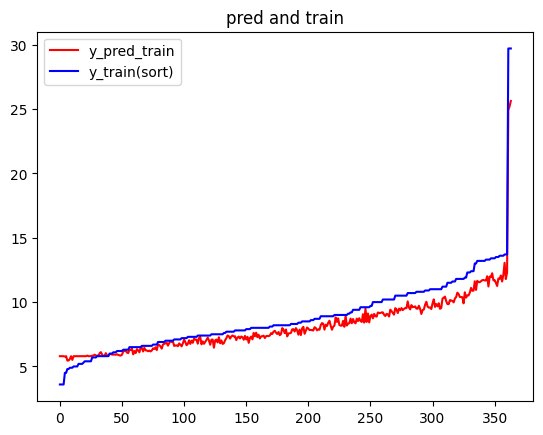

In [ ]:
# train資料預測值與其對應實際值折線圖(依據實際重量由小到大排序)
item = range(len(y_train))

# plt.plot(epochs,acc, 'b', label='Training accuracy')
# plt.plot(epochs, val_acc, 'r', label='validation accuracy')
# plt.title('Training and validation accuracy')
# plt.legend(loc='lower right')
# plt.figure()

plt.plot(item, y_pred_train, 'r', label='y_pred_train')
# plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.plot(item, y_train, 'b', label='y_train(sort)')
plt.title('pred and train')
plt.legend()
plt.show()

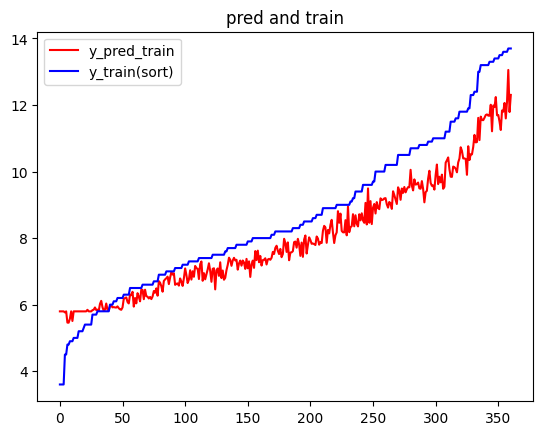

In [ ]:
# train資料預測值與其對應實際值折線圖(依據實際重量由小到大排序)(去除極端值)
item = range(len(y_train)-3)

# plt.plot(epochs,acc, 'b', label='Training accuracy')
# plt.plot(epochs, val_acc, 'r', label='validation accuracy')
# plt.title('Training and validation accuracy')
# plt.legend(loc='lower right')
# plt.figure()

plt.plot(item, y_pred_train[0:-3], 'r', label='y_pred_train')
# plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.plot(item, y_train[0:-3], 'b', label='y_train(sort)')
plt.title('pred and train')
plt.legend()
plt.show()